### In this project we will predict mobile price

the data have shape 2000 row and 21 column

### Detail of data
<pre>
battery_power : Total energy a battery can store in one time measured in mAh
blue          : Has bluetooth or not
clock_speed   : speed at which microprocessor executes instructions
dual_sim      : Has dual sim support or not
fc            : Front Camera mega pixels
four_g        : Has 4G or not
int_memory    : Internal Memory in Gigabytes
m_dep         : Mobile Depth in cm
mobile_wt     : Weight of mobile phone
n_cores       : Number of cores of processor
pc            : Primary Camera mega pixels
px_height     : Pixel Resolution Height
px_width      : Pixel Resolution Width
ram           : Random Access Memory in Mega Bytes
sc_h          : Screen Height of mobile in cm
sc_w          : Screen Width of mobile in cm
talk_time     : longest time that a single battery charge will last when you are
three_g       : Has 3G or not
touch_screen  : Has touch screen or not
wifi          : Has wifi or not
<pre>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## The data have 2 file, train and test

for the data test we will using it to train the machine learning and choose the best machine learning with the highest accuracy

### Read the file train as df_train, and file test as df_test

In [2]:
df_train = pd.read_csv(r'D:\Imam\Belajar\Python\Data_Science\Mobile_Price_Classification\train.csv', sep = ',')
df_test = pd.read_csv(r'D:\Imam\Belajar\Python\Data_Science\Mobile_Price_Classification\test.csv', sep = ',')

### Print all column in df_train and df_test

In [3]:
df_train.columns.unique()

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [4]:
df_test.columns.unique()

Index(['id', 'battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc',
       'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc',
       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi'],
      dtype='object')

#### As you can see, in df_test we have column name 'id', so we will delete it because the data have index

### Check the type of data

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

### Check the Nan and Null data

In [6]:
print(f'{df_train.isna().sum()}\n\n{(df_test.isna().sum())}')

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

id               0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
dtype: int64


In [7]:
df_train.drop_duplicates()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.20,0,1,0,7,0.60,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.50,1,0,1,53,0.70,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.50,1,2,1,41,0.90,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.50,0,0,0,10,0.80,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.20,0,13,1,44,0.60,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.50,1,0,1,2,0.80,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.60,1,0,0,39,0.20,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.90,1,1,1,36,0.70,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.90,0,4,1,46,0.10,145,5,...,336,670,869,18,10,19,1,1,1,0


#### The type data is int64 and float64 so we can use it to machine learning

### Check data distribution

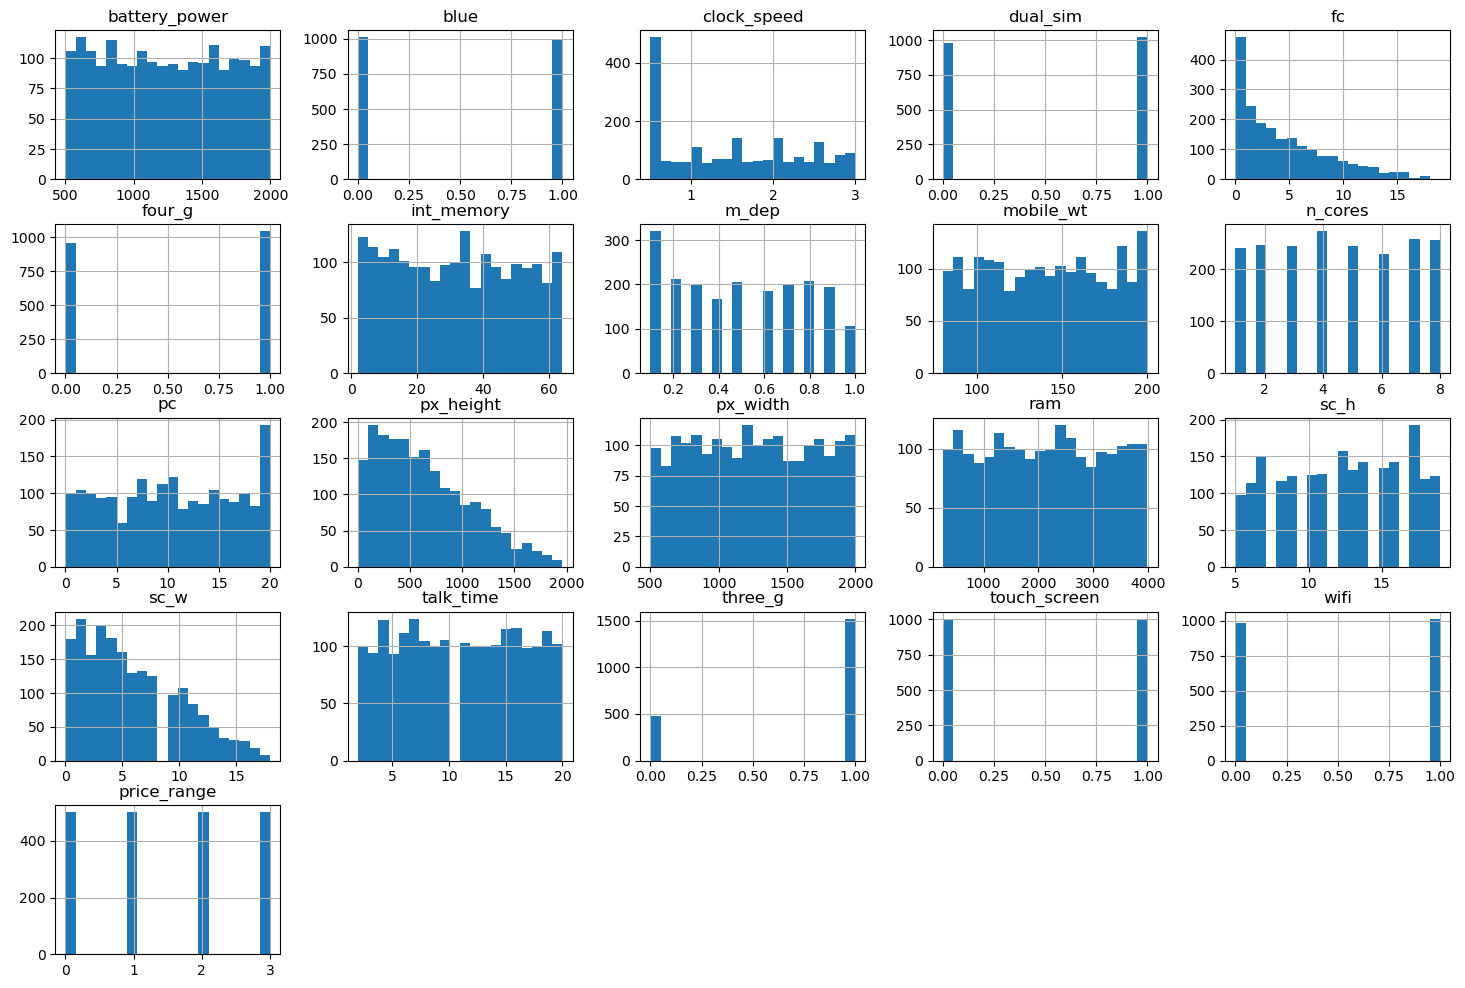

In [8]:
df_train.hist(bins = 20, figsize = (18,12))
plt.show()

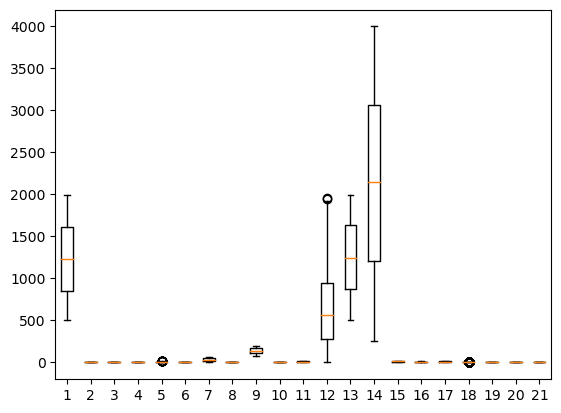

In [9]:
plt.boxplot(df_train)
plt.show()

#### Some data have a value 0 or 1, and some data have a value outlers

In [10]:
# Make a target
target = df_train['price_range']

# Drop column price_range, because we use it to target
df_train.drop(['price_range'], axis = 1, inplace = True)

In [11]:
# We use split data train : test for training the machine learning with portion 80 : 20
X_train, X_test, y_train, y_test = train_test_split(df_train, target, random_state = 42, train_size = 0.8)

print(f'train size  : {X_train.shape[0]}\n'
      f'test_size   : {X_test.shape[0]}\n'
      f'total_size  : {df_train.shape[0]}')

train size  : 1600
test_size   : 400
total_size  : 2000


#### We have 1600 data train and 400 data test for machine learning

### For the efficient we using the model LazyClassifier to check the best machine learning to use 

In [12]:
model = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric = None)
models, predictions = model.fit(X_train, X_test, y_train, y_test)
print(models)

100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:04<00:00,  7.21it/s]

                               Accuracy  Balanced Accuracy ROC AUC  F1 Score  \
Model                                                                          
LogisticRegression                 0.97               0.97    None      0.98   
LinearDiscriminantAnalysis         0.94               0.95    None      0.95   
QuadraticDiscriminantAnalysis      0.94               0.94    None      0.94   
LGBMClassifier                     0.91               0.91    None      0.91   
XGBClassifier                      0.90               0.90    None      0.90   
RandomForestClassifier             0.89               0.89    None      0.89   
SVC                                0.89               0.89    None      0.89   
NuSVC                              0.89               0.89    None      0.89   
ExtraTreesClassifier               0.87               0.87    None      0.87   
LinearSVC                          0.88               0.86    None      0.87   
CalibratedClassifierCV             0.88 

#### From LazyClassifier, the highest accuracy is LogisticRegression, So we will using the model LogisticRegression to make a predict to price_range from the df_test

In [13]:
SC = StandardScaler()
X_train = SC.fit_transform(X_train)
X_test = SC.transform(X_test)

In [14]:
Model_LR = LogisticRegression()
Model_LR.fit(X_train, y_train)

LogisticRegression()

In [15]:
y_pred_LR = Model_LR.predict(X_test)

In [16]:
accuracy_score(y_test, y_pred_LR)

0.975

In [17]:
df_test.drop(['id'], axis = 1, inplace = True)
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1043,1,1.80,1,14,0,5,0.10,193,3,16,226,1412,3476,12,7,2,0,1,0
1,841,1,0.50,1,4,1,61,0.80,191,5,12,746,857,3895,6,0,7,1,0,0
2,1807,1,2.80,0,1,0,27,0.90,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,1546,0,0.50,1,18,1,25,0.50,96,8,20,295,1752,3893,10,0,7,1,1,0
4,1434,0,1.40,0,11,1,49,0.50,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.90,0,0,1,54,0.50,170,7,17,644,913,2121,14,8,15,1,1,0
996,609,0,1.80,1,0,0,13,0.90,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,1185,0,1.40,0,1,1,8,0.50,80,1,12,477,825,1223,5,0,14,1,0,0
998,1533,1,0.50,1,0,0,50,0.40,171,2,12,38,832,2509,15,11,6,0,1,0


In [18]:
df_test_predict = SC.transform(df_test)
predicted_values = Model_LR.predict(df_test_predict)

In [19]:
df_test['predicted_price_range'] = predicted_values
df_test

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,predicted_price_range
0,1043,1,1.80,1,14,0,5,0.10,193,3,...,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.50,1,4,1,61,0.80,191,5,...,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.80,0,1,0,27,0.90,186,3,...,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.50,1,18,1,25,0.50,96,8,...,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.40,0,11,1,49,0.50,108,6,...,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.90,0,0,1,54,0.50,170,7,...,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.80,1,0,0,13,0.90,186,4,...,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.40,0,1,1,8,0.50,80,1,...,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.50,1,0,0,50,0.40,171,2,...,38,832,2509,15,11,6,0,1,0,2


In [20]:
df_test.to_csv('Data_Test_Predict.csv')